In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/teo/userdata/git_libraries/jgb-omr


In [2]:
from data_utils import JeongganboReader
from pathlib import Path

reader = JeongganboReader(run_omr=True)

jgb_dir = Path('jeongganbo-png/pngs/')

page_by_inst = {'haegeum': (21, 38),
                'ajaeng': (15,32),
                'daegeum': (19,36),
                'gayageum': (21,38),
                'geomungo': (17,34),
                'piri': (23,40)}

piece_by_inst = {}



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [3]:
error_jeonggan_dir = Path("error_jeonggans")
error_jeonggan_png_list = list(error_jeonggan_dir.glob("*.png"))

for png_path in error_jeonggan_png_list:
  out = reader.omr(str(png_path))
  print(png_path.stem, '/', out)

222_0_청태:10 -:5 :8 / 청태:5
52_16_청태:10 -:5 :8 / 청태:5
73_8_배남:1 배임:1 배임:3 -:5 -:8 / 배남:1 배임:3 -:5 -:8
155_1_-:2 -:5 -:7 퇴성:9 니:11 / -:2 -_추성:5 니:8
138_1_배남:2 -:5  / 배남:2 -:5 배임:8
141_8_태:10 :11:11 / 태_퇴성:5
20_16_청태:10 -:5 :8 / 청태:5
72_4_청태:10 -:5 :8 / 청태:5
44_18_태:10 :11:11 / 태_루러표:5
218_7_청태:10 -:5 :8 / 청태:5
71_10_태:10 :11:11 / 태_루러표:5
3_0_황:11 / -:2 황:5 -:8
159_4_-:2 -:5 -:7 퇴성:9 니:11 / -:2 -_퇴성:5 -:7 니:9
84_10_청태:10 -:5 :8 / 청태:5
41_8_배남:1 배임:1 배임:3 -:5 -:8 / 배남:1 배임:3 -:5 -:8
33_8_배남:1 배임:1 배임:3 -:5 -:8 / 배남:1 배임:3 -:5 -:8
68_10_태:10 :11:11 / 태_루러표:5
176_8_중:10 중:5 / 중:5
33_2_중:1 청무:3 청황:14 청중:9 / 배황_뜰_?:5
14_8_배남:1 배임:1 배임:3 -:5 -:8 / 배남:1 배임:3 -:5 -:8
41_18_태:10 :11:11 / 태_루러표:5
93_16_청태:10 -:5 :8 / 청태:5
1_19_같은음표_니레:2 -:4 니:6 :8:8 / 노:2 -:4 니_추성:6 느나:8
161_4_-:2 -:5 -:7 퇴성:9 니:11 / -:2 -:5 -:7 노:9
43_18_태:10 :11:11 / 태_루러표:5


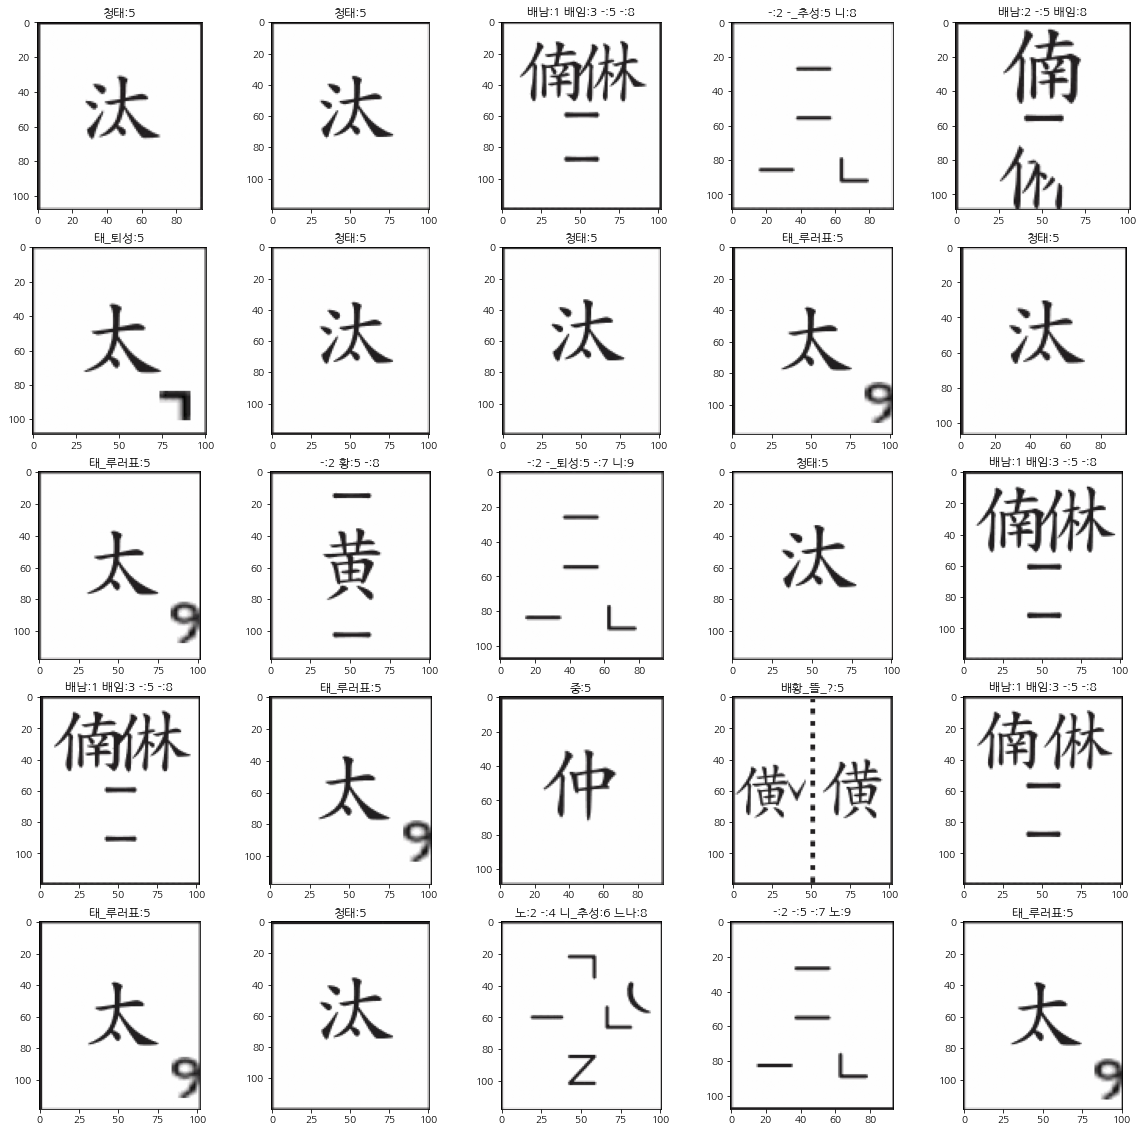

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(20, 20))

for idx, png_fn in enumerate(error_jeonggan_png_list[:25]):
  plt.subplot(5, 5, idx+1)
  plt.imshow(plt.imread(png_fn))
  plt.title(reader.omr(str(png_fn)))


# Parse

In [4]:
for inst, (start, end) in page_by_inst.items():
  target_img_list = sorted([x for x in jgb_dir.glob('*.png') if inst in x.name])[start:end]
  piece_by_inst[inst] = reader.parse_multiple_pages(target_img_list)[0]

Processing jeongganbo-png/pngs/haegeum_pg-022.png
Processing jeongganbo-png/pngs/haegeum_pg-023.png
Processing jeongganbo-png/pngs/haegeum_pg-024.png
Processing jeongganbo-png/pngs/haegeum_pg-025.png
Processing jeongganbo-png/pngs/haegeum_pg-026.png
Processing jeongganbo-png/pngs/haegeum_pg-027.png
Processing jeongganbo-png/pngs/haegeum_pg-028.png
Processing jeongganbo-png/pngs/haegeum_pg-029.png
Processing jeongganbo-png/pngs/haegeum_pg-030.png
Processing jeongganbo-png/pngs/haegeum_pg-031.png
Processing jeongganbo-png/pngs/haegeum_pg-032.png
Processing jeongganbo-png/pngs/haegeum_pg-033.png
Processing jeongganbo-png/pngs/haegeum_pg-034.png
Processing jeongganbo-png/pngs/haegeum_pg-035.png
Processing jeongganbo-png/pngs/haegeum_pg-036.png
Processing jeongganbo-png/pngs/haegeum_pg-037.png
Processing jeongganbo-png/pngs/haegeum_pg-038.png
Processing jeongganbo-png/pngs/ajaeng_pg-016.png
Processing jeongganbo-png/pngs/ajaeng_pg-017.png
Processing jeongganbo-png/pngs/ajaeng_pg-018.png
Pro

In [44]:
import unicodedata


jeonggan_dir = 'jeongganbo-png/yeominlak_edited/'
png_label_files = sorted(list(Path(jeonggan_dir).glob('*.png')))
file_name_and_label = {}
for png_label_file in png_label_files:
  fn, label = png_label_file.stem.split('__')
  file_name_and_label[unicodedata.normalize('NFC', fn.replace('._', ''))] = unicodedata.normalize('NFC', label)
# file_name_and_label

In [49]:
import cv2
from collections import defaultdict
jeonggan_dir = 'jeongganbo-png/yeominlak_edited/'

added_lines = []
added_labels = defaultdict(int)

for inst in piece_by_inst:
  piece = piece_by_inst[inst]
  for jeonggan in piece.jeonggans:
    fn_label = f"여민락_{inst}_{jeonggan.gak_id}각_{jeonggan.beat}({jeonggan.piece_beat})번째__{jeonggan.omr_text}.png"
    fn, label = Path(fn_label).stem.split('__')
    if file_name_and_label[fn] != label:
      print(fn, label, file_name_and_label[fn])
      label_key = label + '->' + file_name_and_label[fn]
      if added_labels[label_key] > 5:
        continue
      add_string = f"여민락_{inst}_{jeonggan.piece_beat}.png,여민락,{inst},{jeonggan.piece_beat},{file_name_and_label[fn]}"
      added_lines.append(add_string)
      added_labels[label_key] += 1

    # cv2.imwrite(jeonggan_dir + fn, jeonggan.img)

with open('added_labels.csv', 'w') as f:
  f.write('\n'.join(added_lines))

여민락_haegeum_9각_7(187)번째 겹요성표:5 요성표:5
여민락_haegeum_9각_10(190)번째 황_퇴성:5 황_추성:5
여민락_haegeum_12각_7(247)번째 -:2 -_퇴성:5 태:8 -:2 -_겹흘림표:5 태:8
여민락_haegeum_13각_1(261)번째 -_퇴성:2 -:5 태_퇴성:8 -:2 -_겹흘림표:5 태:8
여민락_haegeum_13각_11(271)번째 겹요성표:5 요성표:5
여민락_haegeum_13각_17(277)번째 겹요성표:5 요성표:5
여민락_haegeum_14각_3(283)번째 겹요성표:5 요성표:5
여민락_haegeum_14각_15(295)번째 겹요성표:5 요성표:5
여민락_haegeum_15각_9(309)번째 황_퇴성:5 황_추성:5
여민락_haegeum_15각_15(315)번째 겹요성표:5 요성표:5
여민락_haegeum_16각_13(333)번째 겹요성표:5 요성표:5
여민락_haegeum_33각_7(667)번째 겹요성표:5 요성표:5
여민락_haegeum_34각_10(690)번째 황_퇴성:5 황_추성:5
여민락_haegeum_37각_8(748)번째 황_퇴성:5 황_추성:5
여민락_haegeum_40각_1(801)번째 겹요성표:5 요성표:5
여민락_haegeum_48각_7(967)번째 -:2 -_퇴성:5 황:8 -:2 -:5 황:8
여민락_haegeum_48각_8(968)번째 중_퇴성:5 중_추성:5
여민락_haegeum_48각_17(977)번째 겹요성표:5 요성표:5
여민락_haegeum_72각_7(1447)번째 겹요성표:5 요성표:5
여민락_haegeum_73각_7(1467)번째 겹요성표:5 요성표:5
여민락_haegeum_84각_8(1688)번째 황_퇴성:5 황_추성:5
여민락_haegeum_84각_12(1692)번째 황_퇴성:5 황_추성:5
여민락_haegeum_93각_15(1875)번째 겹요성표:5 요성표:5
여민락_haegeum_100각_2(1972)번째 하배남:5 배남:5
여민락_haegeum_1

In [13]:
import cv2
from collections import defaultdict
jeonggan_dir = 'jeongganbo-png/filtered/'

added_lines = []
added_labels = defaultdict(int)

png_fns = sorted(list(Path(jeonggan_dir).glob('*.png')))
for png_fn in png_fns:
  fn, label = png_fn.stem.split('__')
  _, inst, gak_id, beat = fn.split('_')
  piece_beat = beat.split('(')[1].split(')')[0]
  add_string = f"여민락_{inst}_{piece_beat}.png,여민락,{inst},{piece_beat},{label}"
  added_lines.append(add_string)


    # cv2.imwrite(jeonggan_dir + fn, jeonggan.img)
added_lines
with open('added_labels_simple.csv', 'w') as f:
  f.write('\n'.join(added_lines))

In [16]:
import zipfile
import os

# Directory to zip
directory = 'jeongganbo-png/yeominlak/'

# Output zip file name
output_zip = 'yeominlak.zip'

# Create a zip file
with zipfile.ZipFile(output_zip, 'w') as zipf:
  # Iterate over each file in the directory
  for root, dirs, files in os.walk(directory):
    for file in files:
      # Get the full path of the file
      file_path = os.path.join(root, file)
      # Add the file to the zip
      zipf.write(file_path, os.path.relpath(file_path, directory))

print(f'Successfully zipped files in {directory} into {output_zip}.')


Successfully zipped files in jeongganbo-png/yeominlak/ into yeominlak.zip.


In [ ]:
import cv2

outpng_dir = Path('jeongganbo-png/yeominlak/')
outpng_dir.mkdir(exist_ok=True)

unique_omr_text = set()
for inst, piece in piece_by_inst.items():
  for i, jeonggan in enumerate(piece.jeonggans):
    text = jeonggan.omr_text
    if text not in unique_omr_text:
      print(text)
      unique_omr_text.add(jeonggan.omr_text)
      cv2.imwrite(str(outpng_dir / f"yml_{inst}_{i}.png"), jeonggan.img)


In [ ]:
len(unique_omr_text)

In [5]:
from fractions import Fraction
class JeongganTemplate:
  def __init__(self):
    pass

template = {}
template[(5,)] = [0]
template[(10, 11)] = [0, Fraction(1,2)]
template[(10, 14, 15)] = [0, Fraction(1,2), Fraction(3,4)]
template[(12, 13, 11)] = [0, Fraction(1,4), Fraction(1,2)]
template[(12, 13, 14, 15)] = [0, Fraction(1,4), Fraction(1,2), Fraction(3,4)]
template[(2, 5, 8)] = [0, Fraction(1,3), Fraction(2,3)]
template[(2, 5, 7, 9)] = [0, Fraction(1,3), Fraction(2,3), Fraction(5,6)]
template[(2, 4, 6, 8)] = [0, Fraction(1,3), Fraction(1,2), Fraction(2,3)]
template[(2, 4, 6, 7, 9)] = [0, Fraction(1,3), Fraction(1,2), Fraction(2,3), Fraction(5,6)]
template[(1, 3, 5, 8)] = [0, Fraction(1,6), Fraction(1,3), Fraction(2,3)]
template[(1, 3, 5, 7, 9)] = [0, Fraction(1,6), Fraction(1,3), Fraction(2,3), Fraction(5,6)]
template[(1, 3, 4, 6, 8)] = [0, Fraction(1,6), Fraction(1,3), Fraction(1,2), Fraction(2,3)]
template[(1, 3, 4, 6, 7, 9)] = [0, Fraction(1,6), Fraction(1,3), Fraction(1,2), Fraction(2,3), Fraction(5,6)]

template

{(5,): [0],
 (10, 11): [0, Fraction(1, 2)],
 (10, 14, 15): [0, Fraction(1, 2), Fraction(3, 4)],
 (12, 13, 11): [0, Fraction(1, 4), Fraction(1, 2)],
 (12, 13, 14, 15): [0, Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)],
 (2, 5, 8): [0, Fraction(1, 3), Fraction(2, 3)],
 (2, 5, 7, 9): [0, Fraction(1, 3), Fraction(2, 3), Fraction(5, 6)],
 (2, 4, 6, 8): [0, Fraction(1, 3), Fraction(1, 2), Fraction(2, 3)],
 (2, 4, 6, 7, 9): [0,
  Fraction(1, 3),
  Fraction(1, 2),
  Fraction(2, 3),
  Fraction(5, 6)],
 (1, 3, 5, 8): [0, Fraction(1, 6), Fraction(1, 3), Fraction(2, 3)],
 (1, 3, 5, 7, 9): [0,
  Fraction(1, 6),
  Fraction(1, 3),
  Fraction(2, 3),
  Fraction(5, 6)],
 (1, 3, 4, 6, 8): [0,
  Fraction(1, 6),
  Fraction(1, 3),
  Fraction(1, 2),
  Fraction(2, 3)],
 (1, 3, 4, 6, 7, 9): [0,
  Fraction(1, 6),
  Fraction(1, 3),
  Fraction(1, 2),
  Fraction(2, 3),
  Fraction(5, 6)]}

In [9]:
piece_by_inst['haegeum'].jeonggans[0].omr_text

'배임:2 황:5 -:8'

In [12]:
omr_text_cat = '|'.join([x.omr_text for x in piece_by_inst['haegeum'].jeonggans])
omr_text_cat

'배임:2 황:5 -:8|추성:5|배임:5|0:5|배남:2 배임:5 -:8|-:2 -:5 배남:8|황:5|0:5|0:5|겹요성표:5|황:2 중:5 -:8|0:5|0:5|태:5|임:5|0:5|임:5|0:5|0:5|겹요성표:5|임:2 남:5 -:8|임:5|중:5|퇴성:5|태:2 중:5 -:8|요성표:5|태:5|태_니레:2 -:4 니나:6 중:8|황:5|-:2 -_추성:5 배남:8|배임:5|0:5|배남:2 -:5 배임:8|황_추성:5|배무_추성:5|황_추성:5|배임:5|황_추성:5|배임:5|0:5|배임:2 황:5 -:8|0:5|배중:5|요성표:5|배남:2 -:5 배임:8|황:5|남:5|중_추성:5|태:5|0:5|황:5|요성표:2 -:5 배남:8|배임:5|0:5|0:5|0:5|배임:5|0:5|0:5|0:5|임:2 남:5 -:8|0:5|중_추성:5|태:2 -:5 중:8|임:2 남:5 -:8|퇴성:5|임:5|0:5|0:5|겹요성표:5|임:2 남:5 -:8|0:5|임_퇴성:5|중:5|0:5|0:5|중:5|0:5|0:5|퇴성:5|태:2 중:5 -:8|퇴성:5|태:5|0:5|0:5|태_니레:2 -:5 황:8|중_추성:5|태:5|0:5|0:5|태:2 중:5 -_추성:8|임:5|태:2 중:5 -_추성:8|황:5|태:2 -:5 중:8|남:5|중:5|0:5|0:5|퇴성:5|태:2 중:5 -:8|퇴성:5|태:5|0:5|0:5|태_니레:2 -:5 황:8|중_추성:5|태:5|0:5|0:5|태:2 중:5 -_추성:8|중:2 -:5 태:8|임:2 남:5 -:8|남:5|임:5|임_니레:2 -:5 남:8|중:5|0:5|0:5|퇴성:5|태:2 중:5 -:8|퇴성:5|태:5|0:5|0:5|태_니레:2 -:5 황:8|중_추성:5|태:5|0:5|0:5|태:2 중:5 -:8|태:2 -:5 중:8|임:2 남:5 -:8|임:5|태:2 중:5 -_추성:8|태:2 황:5 -:8|황_ㅅ:5|0:5|황_ㅅ:5|0:5|중:5|퇴성:5|태:2 -:5 -:7 황_더름표:9|태:2 -:5 황:8|중:2 -:5 태:8|중:

In [ ]:
# TODO:
# 1. pitch는 변환해주기
# 2. 정간 안에서의 위치 기록해주기 

In [7]:
pitch2midi = {}
pitch_name = ["황" ,'대' ,'태' ,'협' ,'고' ,'중' ,'유' ,'임' ,'이' ,'남' ,'무' ,'응']
octave_name = {"하하배": -3, "하배": -2, "배":-1, '':0, '청':+1, '중청':+2}

for o in octave_name.keys():
  for i, p in enumerate(pitch_name):
    pitch2midi[o+p] = i + 63 + octave_name[o] * 12
pitch2midi

{'하하배황': 27,
 '하하배대': 28,
 '하하배태': 29,
 '하하배협': 30,
 '하하배고': 31,
 '하하배중': 32,
 '하하배유': 33,
 '하하배임': 34,
 '하하배이': 35,
 '하하배남': 36,
 '하하배무': 37,
 '하하배응': 38,
 '하배황': 39,
 '하배대': 40,
 '하배태': 41,
 '하배협': 42,
 '하배고': 43,
 '하배중': 44,
 '하배유': 45,
 '하배임': 46,
 '하배이': 47,
 '하배남': 48,
 '하배무': 49,
 '하배응': 50,
 '배황': 51,
 '배대': 52,
 '배태': 53,
 '배협': 54,
 '배고': 55,
 '배중': 56,
 '배유': 57,
 '배임': 58,
 '배이': 59,
 '배남': 60,
 '배무': 61,
 '배응': 62,
 '황': 63,
 '대': 64,
 '태': 65,
 '협': 66,
 '고': 67,
 '중': 68,
 '유': 69,
 '임': 70,
 '이': 71,
 '남': 72,
 '무': 73,
 '응': 74,
 '청황': 75,
 '청대': 76,
 '청태': 77,
 '청협': 78,
 '청고': 79,
 '청중': 80,
 '청유': 81,
 '청임': 82,
 '청이': 83,
 '청남': 84,
 '청무': 85,
 '청응': 86,
 '중청황': 87,
 '중청대': 88,
 '중청태': 89,
 '중청협': 90,
 '중청고': 91,
 '중청중': 92,
 '중청유': 93,
 '중청임': 94,
 '중청이': 95,
 '중청남': 96,
 '중청무': 97,
 '중청응': 98}

In [8]:
import re

def get_position_tuple(omr_text:str):
  return tuple([int(y) for y in  re.findall(r':(\d+)', omr_text)])


piece = piece_by_inst['haegeum']
set([get_position_tuple(x.omr_text) for x in piece.jeonggans])

{(1, 3, 5, 8), (2, 4, 6, 8), (2, 5, 7, 9), (2, 5, 8), (5,)}

In [20]:
error_text_templates = {}
error_text_templates['고_니레:2 -:5 니나:8'] = '청태_니레:2 -:5 니나:8'
# error_text_templates['배남_니레:1 황:3 중:5 황:4 중:6 태_느니르:8'] = '배남_니레_퇴성:5'
# error_text_templates['황:2 -:4 니:6 배남:8 배남_나니로:8'] = '황:2 -:4 니:6 배남_퇴성:8'
# error_text_templates['-:2 -:5 노:9'] = '-:2 -:5 -:7 노:9'
# error_text_templates['-_농음표:2 니:8'] = '추성:5'

# error_text_templates['하배중_퇴성_퇴성_8:5 -:8'] = '중_ㅅ_퇴성:5'
# error_text_templates['하배중_퇴성:5 -:7 니나_2_3:9'] = '중_퇴성:5'
# error_text_templates['-:2 -:5 노:9'] = '-:2 -:5 -:7 노:9'
# error_text_templates['배황:2 -:5 -:7 퇴성:9 :11'] = '배황:2 -:5 -:7 쉼표:9'
# error_text_templates['태:1 임:5'] = '요성표:5'
# error_text_templates['태:10 황:2 중:5 -:8'] = '태:2 황:5 -:8'
# error_text_templates['태:1'] = '요성표_추성표:5'
# error_text_templates['-:2 -:4 노:6 청무_느니르'] = '-:2 -:4 노:6 남_추성표:8'


In [21]:
from data_utils import Jeonggan
import matplotlib.pyplot as plt

def parse_omr_results(jeonggan: Jeonggan):
  text = jeonggan.omr_text.replace(':5:5', ':5')
  notes = text.split(' ')
  notes = [x for x in notes if len(x)>2]
  text = ' '.join(notes)
  if text in error_text_templates:
    text = error_text_templates[text]
    notes = text.split(' ')
    notes = [x for x in notes if len(x)>2]
  position_tuple = get_position_tuple(text)
  if position_tuple not in template:
    print(f'position_tuple {position_tuple} not in template', text, jeonggan)
    return
  by_note_position = template[position_tuple]
  out = [Symbol(notes[i], offset=by_note_position[i]) for i in range(len(notes))]
  jeonggan.symbols = out
  return out


class Symbol:
  def __init__(self, text:str, offset=0):
    # example of text: '배임:5' or '-:8', '임_느니르:3'
    self.offset = offset
    note_and_ornament = text.split(':')[0]
    self.note = note_and_ornament.split('_')[0]
    self.ornament = note_and_ornament.split('_')[1:] if '_' in note_and_ornament else None
    if self.note in pitch2midi:
      self.midi = pitch2midi[self.note]
    else:
      self.midi = 0
  
  def __repr__(self) -> str:
    return f'{self.note}({self.midi}) - {self.ornament} @ {self.offset}'

for inst, piece in piece_by_inst.items():
  print(inst)
  for jeonggan in piece.jeonggans:
    out = parse_omr_results(jeonggan)
    if out is None:
      print(inst, jeonggan.piece_beat)
      plt.imshow(jeonggan.img)
      plt.show()
    elif '고' in [x.note for x in out]:
      print(inst, jeonggan)
      print(jeonggan.omr_text)
      plt.imshow(jeonggan.img)
      plt.show()

haegeum
ajaeng
daegeum
gayageum
geomungo
piri


In [11]:
pitch_name = set()
for piece in piece_by_inst.values():
  for jeonggan in piece.jeonggans:
    pitch_name.add(jeonggan.symbols[0].note)
pitch_name

{'-',
 '0',
 '같은음표',
 '겹요성표',
 '고',
 '남',
 '노',
 '니',
 '무',
 '배남',
 '배무',
 '배임',
 '배중',
 '배태',
 '배황',
 '쉼표',
 '요성표',
 '임',
 '중',
 '청남',
 '청임',
 '청중',
 '청태',
 '청협',
 '청황',
 '추성',
 '태',
 '퇴성',
 '하배남',
 '하배무',
 '하배임',
 '하배중',
 '하배태',
 '하배황',
 '하하배임',
 '황'}

In [ ]:
import numpy as np
import cv2

def get_error_jeonggan(jeonggan: Jeonggan):
  text = jeonggan.omr_text
  position_tuple = get_position_tuple(text)
  if position_tuple not in template:
    return True
  return False

error_jeonggans = []
for inst, piece in piece_by_inst.items():
  for jeonggan in piece.jeonggans:
    if get_error_jeonggan(jeonggan):
      error_jeonggans.append(jeonggan)

img_dir = Path('error_jeonggans/')
img_dir.mkdir(exist_ok=True)
for jeonggan in error_jeonggans:
  img_array:np.ndarray = jeonggan.img
  # save as png
  img_path = img_dir / f'{jeonggan.gak_id}_{jeonggan.beat}_{jeonggan.omr_text}.png'
  cv2.imwrite(str(img_path), img_array)



In [22]:
from collections import OrderedDict
class SigimsaeConverter:
  def __init__(self, scale=['황', '태', '중', '임', '남', '무']):
    self.scale = scale
    self.pitch2midi = OrderedDict({scale: pitch2midi[scale] for scale in self.scale})
    octave_name = {"하하배": -3, "하배": -2, "배":-1, '':0, '청':+1, '중청':+2}
    for o in octave_name.keys():
      for p in self.scale:
        self.pitch2midi[o+p] = self.pitch2midi[p] + octave_name[o] * 12
    self.pitch2midi = OrderedDict(sorted(self.pitch2midi.items(), key=lambda x: x[1]))
    self.pitch2up =  {p: list(self.pitch2midi.keys())[i+1] for i, p in enumerate(list(self.pitch2midi.keys())[:-1])}
    self.pitch2down = {p: list(self.pitch2midi.keys())[i-1] for i, p in enumerate(list(self.pitch2midi.keys())[1:])}
    self.midi_scales = list(self.pitch2midi.values())
  
  def up(self, pitch):
    if type(pitch) == int:
      return self.midi_scales[self.midi_scales.index(pitch)+1]
    return self.pitch2up[pitch]
  
  def down(self, pitch):
    if type(pitch) == int:
      return self.midi_scales[self.midi_scales.index(pitch)-1]
    return self.pitch2down[pitch]
  
  def up2(self, pitch, n=2):
    if type(pitch) == int:
      return self.midi_scales[self.midi_scales.index(pitch)+n]
    for _ in range(n):
      pitch = self.up(pitch)
    return pitch
  
  def down2(self, pitch, n=2):
    if type(pitch) == int:
      return self.midi_scales[self.midi_scales.index(pitch)-n]
    for _ in range(n):
      pitch = self.down(pitch)
    return pitch
  
sigimsae_conv = SigimsaeConverter()
sigimsae_conv.up('태'), sigimsae_conv.up(63)

('중', 65)

In [23]:
from music21 import stream, note as mnote, meter as mmeter, key as mkey, pitch as mpitch

def piece_to_score(piece):
  current_offset = 0
  entire_notes = []
  prev_pitch = 0
  prev_offset = 0
  dur_ratio = 1.5
  for i, jeonggan in enumerate(piece.jeonggans):
    if i == 1920:
      current_offset = i * dur_ratio
      new_note = mnote.Note(prev_pitch, quarterLength=current_offset - prev_offset)
      entire_notes.append(new_note)
      prev_pitch = 0
      dur_ratio = 3.0
      prev_offset = prev_offset * 2
    for symbol in jeonggan.symbols:
      current_offset = (i + symbol.offset) * dur_ratio
      if symbol.note == '-':
        continue
      if symbol.note == '같은음표':
        symbol.midi = prev_pitch
      if symbol.note == '노':
        symbol.midi = sigimsae_conv.down(prev_pitch)
      if symbol.note == '니':
        symbol.midi = sigimsae_conv.up(prev_pitch)
      if symbol.note =="로":
        symbol.midi = sigimsae_conv.down2(prev_pitch)
      if symbol.note == "리":
        symbol.midi = sigimsae_conv.up2(prev_pitch)
        # if prev_offset != current_offset:
      if symbol.midi != 0:
        if prev_pitch != 0:
          new_note = mnote.Note(prev_pitch, quarterLength=current_offset - prev_offset)
          entire_notes.append(new_note)
        prev_offset = current_offset
        prev_pitch = symbol.midi
        if symbol.ornament is not None:
          if '니레' in symbol.ornament:
            grace_pitch = sigimsae_conv.up(symbol.midi)
            entire_notes.append(mnote.Note(grace_pitch, quarterLength=0.5).getGrace())
          if '니나' in symbol.ornament:
            grace_pitch = sigimsae_conv.up2(symbol.midi)
            entire_notes.append(mnote.Note(grace_pitch, quarterLength=0.5).getGrace())
          if '노네' in symbol.ornament:
            grace_pitch = sigimsae_conv.down(symbol.midi)
            entire_notes.append(mnote.Note(grace_pitch, quarterLength=0.5).getGrace())
          if '노니로' in symbol.ornament:
            entire_notes.append(mnote.Note(symbol.midi, quarterLength=0.5).getGrace())
            grace_pitch = sigimsae_conv.up(symbol.midi)
            entire_notes.append(mnote.Note(grace_pitch, quarterLength=0.5).getGrace())

  current_offset = (i+1) * dur_ratio
  new_note = mnote.Note(prev_pitch, quarterLength=current_offset - prev_offset)
  entire_notes.append(new_note)

  score = stream.Stream()
  score.append(mmeter.TimeSignature('60/8'))
  current_key = mkey.KeySignature(-4)
  score.append(current_key)

  for note in entire_notes:
    note.pitch = mpitch.simplifyMultipleEnharmonics(pitches=[note.pitch], keyContext=current_key)[0]
    if note.pitch.accidental.alter == 0:
      note.pitch.accidental = None # delete natural
    score.append(note)
  return score

piece = piece_by_inst['haegeum']
entire_score = stream.Score()
inst_names_in_order = ['daegeum', 'piri', 'haegeum', 'ajaeng', 'gayageum', 'geomungo']
for inst in inst_names_in_order:
  piece = piece_by_inst[inst]
  score = piece_to_score(piece)
  # entire_score.append(score)
  entire_score.insert(0, score)
# score = piece_to_score(piece)
# score.show()
# entire_score.show()

In [24]:
entire_score.write('musicxml', fp='yeominlak_omr6.musicxml')

PosixPath('/home/teo/userdata/git_libraries/jgb-omr/yeominlak_omr6.musicxml')

In [22]:
piece = piece_by_inst['daegeum']
jeonggans = piece.jeonggans[:10]
jeonggans[1].symbols

[-(0) - None @ 0, -(0) - None @ 1/3, 니나(0) - None @ 2/3]

In [ ]:
piece.jeonggans[2].omr_text